In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, classification_report, accuracy_score

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,1,228.69,36.6,1,1
2,31112,0,80.0,0,1,1,0,0,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,1,0,174.12,24.0,0,1
5,56669,0,81.0,0,0,1,0,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,3,0,103.08,18.6,3,0
5106,44873,1,81.0,0,0,1,1,1,125.20,40.0,0,0
5107,19723,1,35.0,0,0,1,1,0,82.99,30.6,0,0
5108,37544,0,51.0,0,0,1,0,0,166.29,25.6,1,0


In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
sum(df.duplicated())

0

In [ ]:
df.dropna(inplace = True)
df.drop('id', axis = 1, inplace=True)

Using decision tree to fill in the missing values

In [ ]:
# bmi_pipe = Pipeline(steps=[('scale',StandardScaler()), ('lr',DecisionTreeRegressor(random_state=42))])
# X = df[['age','gender','bmi']].copy()
# X.gender = X.gender.replace({'Male':0,'Female':1,'Other':2}).astype(np.uint8)
# missing_values = X[X.bmi.isna()]
# X = X[~X.bmi.isna()]
# y = X.pop('bmi')
# bmi_pipe.fit(X,y)
# predicted_bmi = pd.Series(bmi_pipe.predict(missing_values[['age','gender']]), index=missing_values.index)
# df.loc[missing_values.index,'bmi'] = predicted_bmi

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Replace instances' string to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])
df['work_type']=work_type
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,1,1
2,0,80.0,0,1,1,0,0,105.92,32.5,0,1
3,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1,79.0,1,0,1,1,0,174.12,24.0,0,1
5,0,81.0,0,0,1,0,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,1,13.0,0,0,0,3,0,103.08,18.6,3,0
5106,1,81.0,0,0,1,1,1,125.20,40.0,0,0
5107,1,35.0,0,0,1,1,0,82.99,30.6,0,0
5108,0,51.0,0,0,1,0,0,166.29,25.6,1,0


In [ ]:
X = df.iloc[:, df.columns != 'stroke']
y = df['stroke']

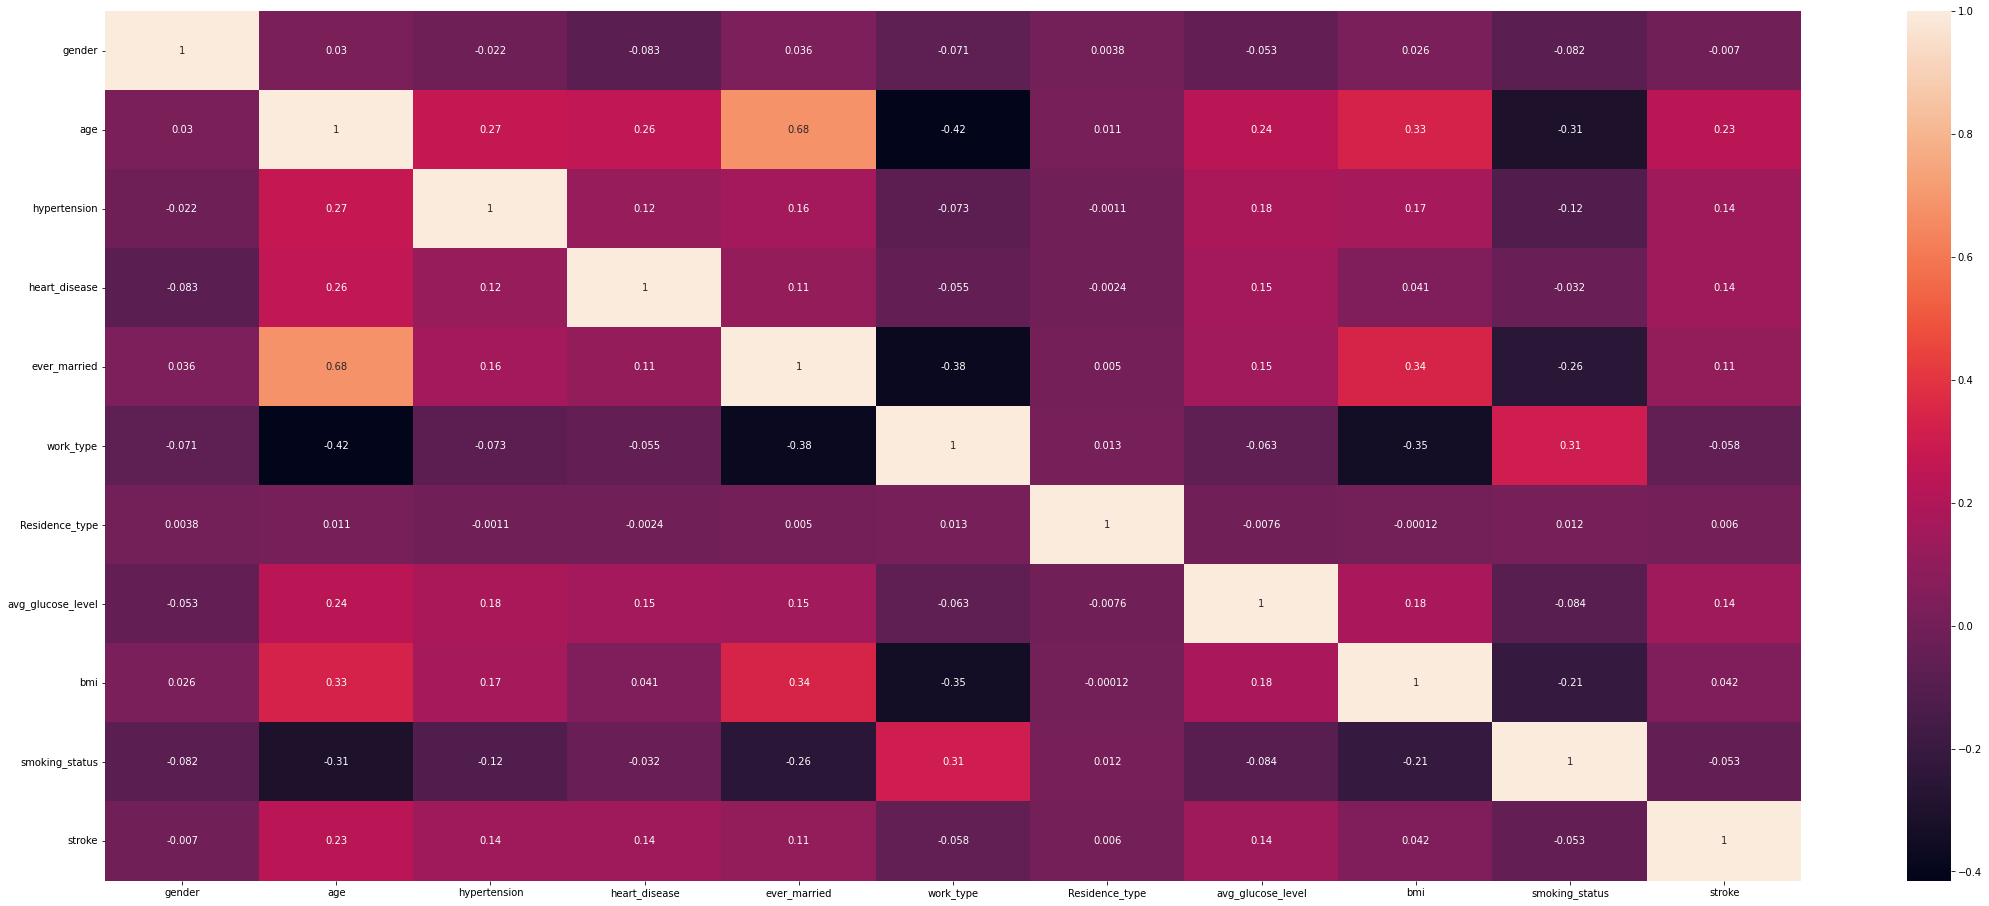

In [ ]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
def run_logistic_regression(df,seed):
    #get the data
    y = df.iloc[:,df.columns == 'stroke']
    X = df.iloc[:, df.columns != 'stroke']
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed, stratify=y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    #scale data for better results
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    #train a model
    model = LogisticRegression();
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')
    #return so we can do coffusion matrix
    return model,X_test_scaled,y_test

In [ ]:
def run_naive_bayes(df,seed):
    #get the data
    y = df.iloc[:,df.columns == 'stroke']
    X = df.iloc[:, df.columns != 'stroke']
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed, stratify=y)
    scaler = preprocessing.StandardScaler().fit(X_train)
    #scale data for better results
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    #train a model
    model = GaussianNB();
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')
    #return so we can do coffusion matrix
    return model,X_test_scaled,y_test

The accuracy for the training set is 86.57%
The accuracy for the test set is 84.83%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


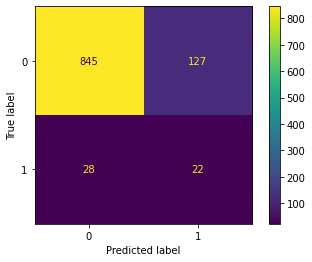

In [ ]:
model,X_test_scaled,y_test = run_naive_bayes(df,12)
yhat = model.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test,yhat)

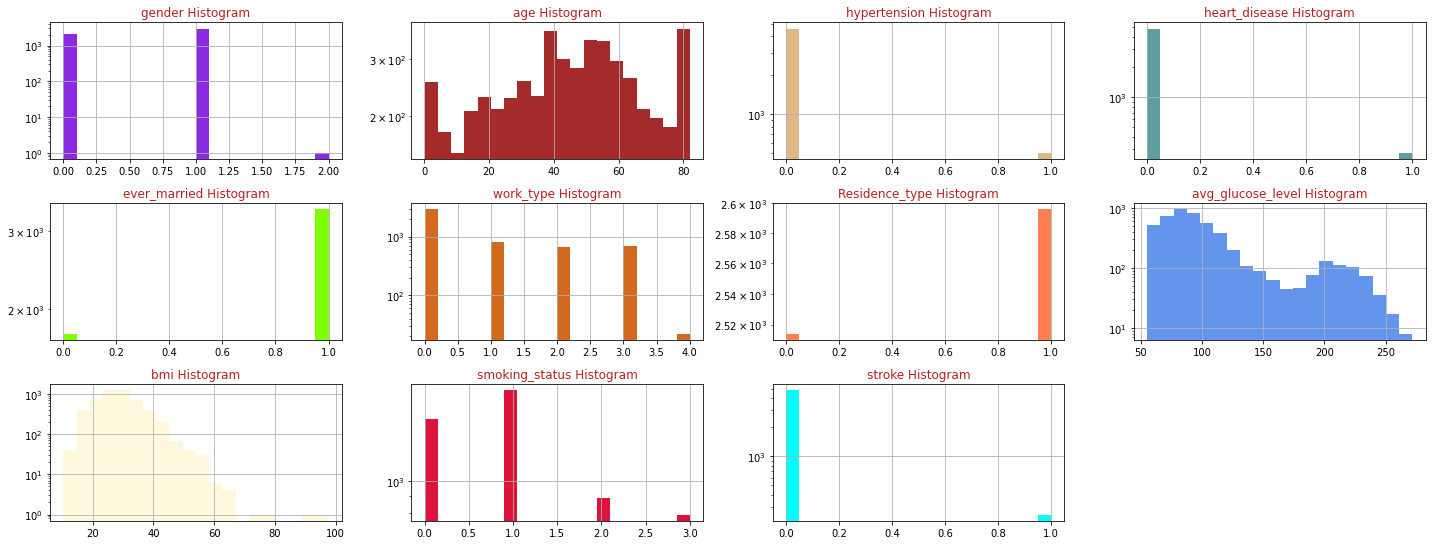

In [ ]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(df.columns):
    f = fig.add_subplot(8, 4, i + 1)
    df[feature].hist(bins = 20, ax = f, facecolor = colors[i])
    f.set_title(feature + " Histogram", color = colors[35])
    f.set_yscale('log')
fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test,yhat))
print('Accuracy Score: ',accuracy_score(y_test,yhat))
print('F1 Score: ',f1_score(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       972
           1       0.15      0.44      0.22        50

    accuracy                           0.85      1022
   macro avg       0.56      0.65      0.57      1022
weighted avg       0.93      0.85      0.88      1022

Accuracy Score:  0.8483365949119374
F1 Score:  0.22110552763819097
